In [11]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
import random, os

# Instantiate plotting tool
%matplotlib inline

In [12]:
def plots(ims, figsize=(12,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [13]:
data_dir = '/home/ubuntu/fastai-data/pokemon_img'
result_path = os.path.join(data_dir, 'results')

In [14]:
plots([image.load_img(
    os.path.join(result_path,'epoch_1.png'))])

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/fastai-data/pokemon_img/results/epoch_1.png'

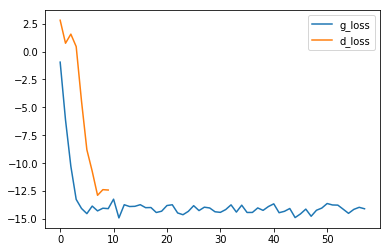

In [16]:
g_loss = np.loadtxt(os.path.join(result_path, 'gan_g_loss_history.csv'))
d_loss = np.loadtxt(os.path.join(result_path, 'gan_d_loss_history.csv'))
plt.plot([x for x in range(len(g_loss))], g_loss, label="g_loss")
plt.plot([x for x in range(len(d_loss))], d_loss, label="d_loss")
plt.legend()
plt.show()